In [6]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from tensorflow import keras

In [2]:
housing = fetch_california_housing()
x_train_full, x_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_full, y_train_full)

In [3]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_valid = scaler.transform(x_valid)
x_test = scaler.transform(x_test)

In [7]:
model = keras.models.Sequential([
                                 keras.layers.Dense(30, activation='relu', input_shape=x_train.shape[1:]),
                                 keras.layers.Dense(1)
])

In [9]:
model.compile(loss='mean_squared_error', optimizer='sgd')
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.0962 - val_loss: 0.5852
Epoch 2/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4933 - val_loss: 0.4880
Epoch 3/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4418 - val_loss: 0.4615
Epoch 4/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4233 - val_loss: 0.4452
Epoch 5/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4119 - val_loss: 0.4375
Epoch 6/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4024 - val_loss: 0.4339
Epoch 7/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3966 - val_loss: 0.4289
Epoch 8/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3903 - val_loss: 0.4235
Epoch 9/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3860 - val_loss: 0.4145
Epoch 10/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3817 - val_loss: 0.4133

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

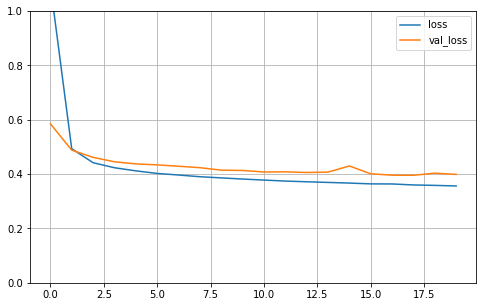

In [12]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [13]:
mse_test = model.evaluate(x_test, y_test)

162/162 [==============================] - 0s 960us/step - loss: 0.3891
